### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Абдуллина Ляйсан Раисовна
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант № 18


1. Набор данных: cherry_blossoms  

2. Независимая переменная: temp_lower  

3. Зависимая переменная: year  

4. Визуализация для независимой переменной – столбчатая диаграмма  

5. Визуализация для зависимой переменной – эмпирическая плотность распределения  

6. Показатель качества регрессии – MAE (mean absolute error)


1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.  

Все необходимы библиотеки:

In [146]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Загружаем заданный набор данных:

In [147]:
df = tfds.load("cherry_blossoms", split='train')
df

<_PrefetchDataset element_spec={'doy': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_lower': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_upper': TensorSpec(shape=(), dtype=tf.float32, name=None), 'year': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

Преобразуем в датафрейм

In [148]:
df = tfds.as_dataframe(df)
df.head()

,doy,temp,temp_lower,temp_upper,year
0,NaN,6.46,4.76,8.16,1300
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617


Оставим в наборе данных признаки, принимающие непрерывные числовые значения, включая независимую и зависимую переменные (temp_lower и  year соответственно).
Таким образом, удаляем doy.

In [149]:
df.drop(columns = ['doy'], inplace = True)
df.head()

,temp,temp_lower,temp_upper,year
0,6.46,4.76,8.16,1300
1,5.63,4.90,6.37,1638
2,5.81,4.68,6.95,1347
3,5.70,4.87,6.53,1187
4,6.20,5.31,7.09,1617


Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.

In [150]:
cormatrix = df.corr()
cormatrix

,temp,temp_lower,temp_upper,year
temp,1.000000,0.663891,0.767866,-0.066062
temp_lower,0.663891,1.000000,0.030739,0.479762
temp_upper,0.767866,0.030739,1.000000,-0.499087
year,-0.066062,0.479762,-0.499087,1.000000


Выведем названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией:

In [151]:
np.fill_diagonal(cormatrix.values, np.nan)

low = cormatrix.unstack().sort_values().dropna().head(1).index.tolist()
high = cormatrix.unstack().sort_values(ascending=False).dropna().head(1).index.tolist()

print("Пары с низкой корреляцией: ", low)
print("Пары с высокой корреляцией ", high)

Пары с низкой корреляцией:  [('temp_upper', 'year')]
Пары с высокой корреляцией  [('temp', 'temp_upper')]


2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.  

Визуализация для независимой переменной temp_lower – столбчатая диаграмма  

Визуализация для зависимой переменной year – эмпирическая плотность распределения  

Для удобства обозначаем наши переменные (чтоб не писать в кавыках)

In [152]:
temp_lower_indep ='temp_lower'
year_dep = 'year'

Строим столбчатую диаграмму:

Text(0.5, 1.0, 'Plot')

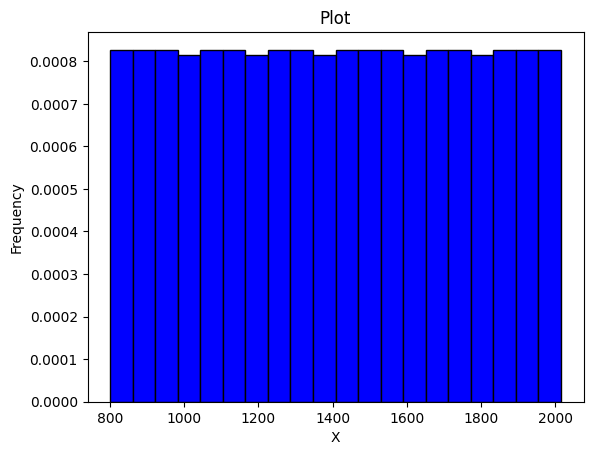

In [153]:
df[year_dep].plot.hist(color='blue', edgecolor='black', bins=20, density=True);
plt.xlabel('X')
plt.title('Plot')

Text(0.5, 1.0, 'Столбчатая диаграмма переменной (высота)')

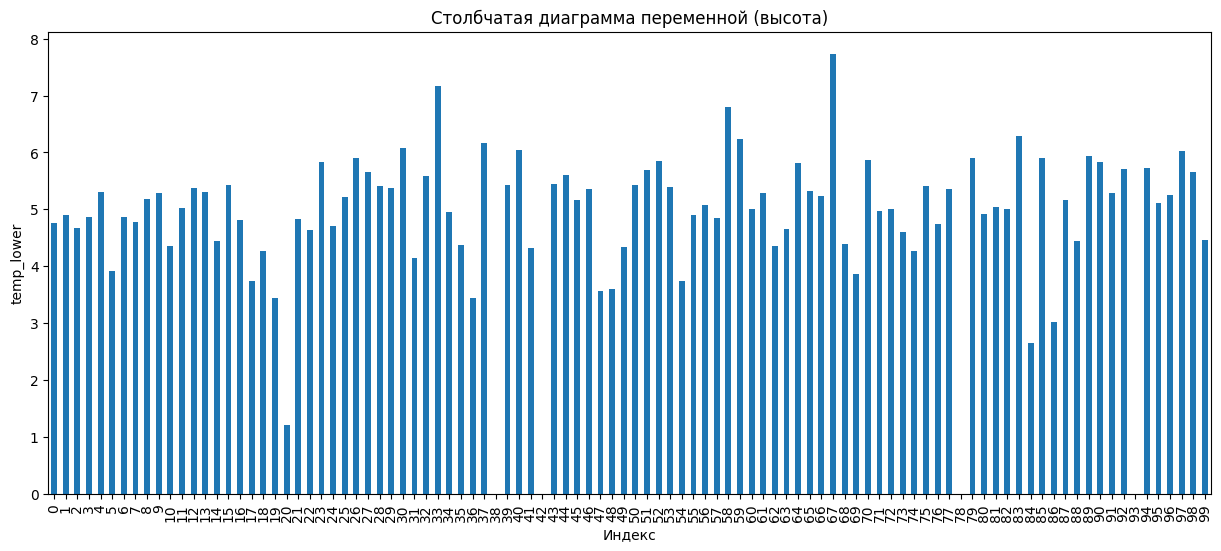

In [154]:
df[temp_lower_indep].head(100).plot.bar(title='Столбчатая диаграмма признака', figsize=(15,6));
plt.xlabel('Индекс')
plt.ylabel(temp_lower_indep)
plt.title('Столбчатая диаграмма переменной (высота)')


3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.  

Строим диаграмму:

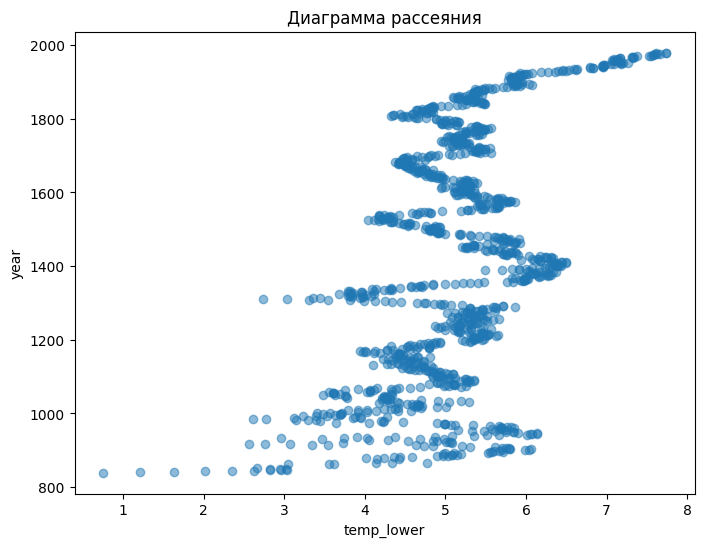

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(df[temp_lower_indep], df[year_dep], alpha=0.5)
plt.xlabel(temp_lower_indep)
plt.ylabel(year_dep)
plt.title('Диаграмма рассеяния')

plt.show()

Удаляем одиночные точки

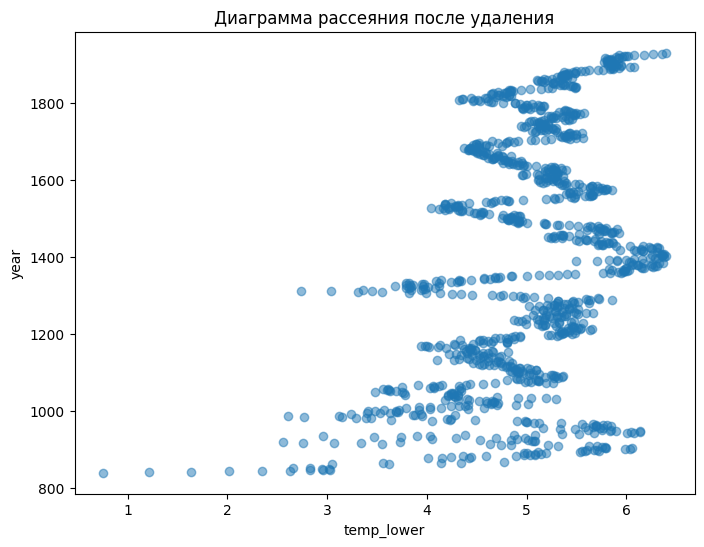

In [156]:
quantile_95_1 = df[temp_lower_indep].quantile(0.95)
quantile_95_2 = df[year_dep].quantile(0.95)

df = df[(df[temp_lower_indep] <= quantile_95_1) & (df[year_dep] <= quantile_95_2)]

plt.figure(figsize=(8, 6))
plt.scatter(df[temp_lower_indep], df[year_dep], alpha=0.5)
plt.xlabel(temp_lower_indep)
plt.ylabel(year_dep)
plt.title('Диаграмма рассеяния после удаления')
plt.show()

4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества $R^2$ (коэффициенту детерминации).  

Создаем класс

In [157]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

Вычисляем при точном подходе

In [158]:
x, y = df[temp_lower_indep], df[year_dep]
reg = SimpleLinReg()
reg.fit(x, y)
i1 = r2_score(y, reg.predict(x))
print('При точном подходе', i1)

При точном подходе 0.1381873878903066


Обучаем модель и вычисляем значение

In [159]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)

model.fit(x, y, epochs=200, verbose = 0)
i2  = r2_score(y, model.predict(x))
print('При использовании нейронной сети с одним нейроном', i2)

34/34 [==============================] - 0s 1ms/step
При использовании нейронной сети с одним нейроном 0.10031040295446136


Вычислим какой подход лучше:

In [160]:
if i1 > i2:
  print('Линейный подход лучше')
elif (i2 > i1):
  print('Нейронный подход лучше')
else:
  print('Они одинаковые...')

Линейный подход лучше


5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.   

Строим график

34/34 [==============================] - 0s 1ms/step


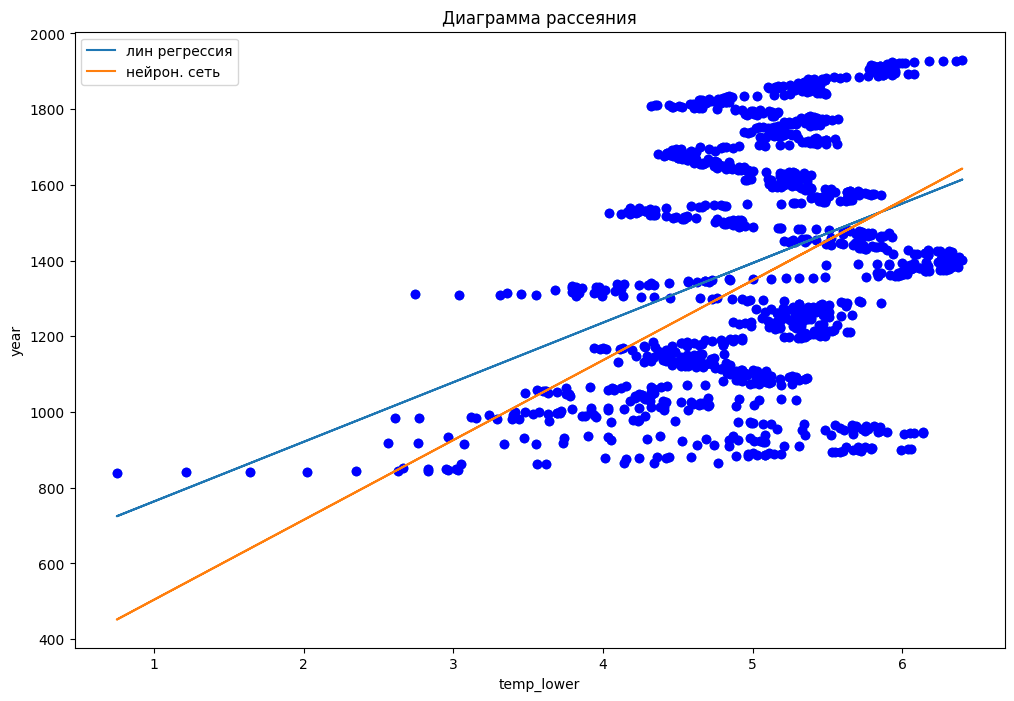

In [161]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.scatter(x, y, c='blue')
plt.plot(x, reg.predict(x), label='лин регрессия')
plt.plot(x, model.predict(x), label='нейрон. сеть')
plt.xlabel(temp_lower_indep)
plt.ylabel(year_dep)
plt.title("Диаграмма рассеяния")
plt.legend();

6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак.  

Разбиение на выборки

In [162]:
x_trainn, x_testn, y_trainn, y_testn = train_test_split(df.drop(columns = [year_dep]), df[year_dep], test_size=0.15)
x_trainn.shape, x_testn.shape, y_trainn.shape, y_testn.shape

((906, 3), (161, 3), (906,), (161,))

In [163]:
df = df.dropna()

Создание и адаптация нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака)

In [164]:
X = df.drop([year_dep],axis=1)
Y = df[year_dep]

mean_y = df[year_dep].mean()
std_y = df[year_dep].std()

Y = (df[year_dep] - mean_y) / std_y

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Нормализация зависиммого признака

In [165]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train)

7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:
     * линейной регрессии
     * гребневой регрессии (L2)
     * лассо регрессии (L1)

Выберите коэффициенты регуляризации l1 и l2 так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки # уменьшалось в процессе обучения).  

Используем созданный нами слой для построения на базе следующих моделей множественной регрессии: линейной регрессии, гребневой регрессии (L2), лассо регрессии (L1)

In [166]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history = linear_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [167]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history1 = l1_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [168]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history2 = l2_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

8. Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

In [169]:
mae_linear = mean_absolute_error(y_test, linear_model.predict(x_test))
mae_l1 = mean_absolute_error(y_test, l1_model.predict(x_test))
mae_l2 = mean_absolute_error(y_test, l2_model.predict(x_test))

print("MAE:")
print("Linear Model:", mae_linear)
print("L1 Model:", mae_l1)
print("L2 Model:", mae_l2)

7/7 [==============================] - 0s 3ms/step
MAE:
Linear Model: 0.6273084269708628
L1 Model: 0.6556272127136742
L2 Model: 0.6073546563275116


9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).  

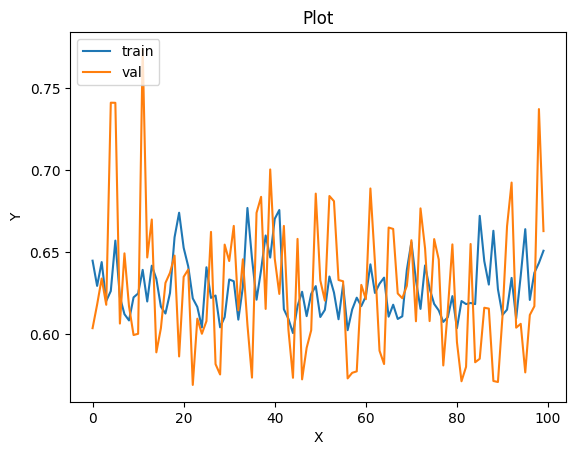

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

10. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами.  Подпишите оси и создайте легенду и заголовок для рисунка.

In [171]:
x_test[x_test.drop([temp_lower_indep],axis=1).columns] = x_test.drop([temp_lower_indep],axis=1).median()
x_test

,temp,temp_lower,temp_upper
839,6.035,5.20,6.965
747,6.035,5.47,6.965
186,6.035,4.48,6.965
92,6.035,5.71,6.965
468,6.035,5.45,6.965
...,...,...,...
1096,6.035,5.12,6.965
333,6.035,5.95,6.965
311,6.035,5.49,6.965
1029,6.035,6.16,6.965


7/7 [==============================] - 0s 2ms/step


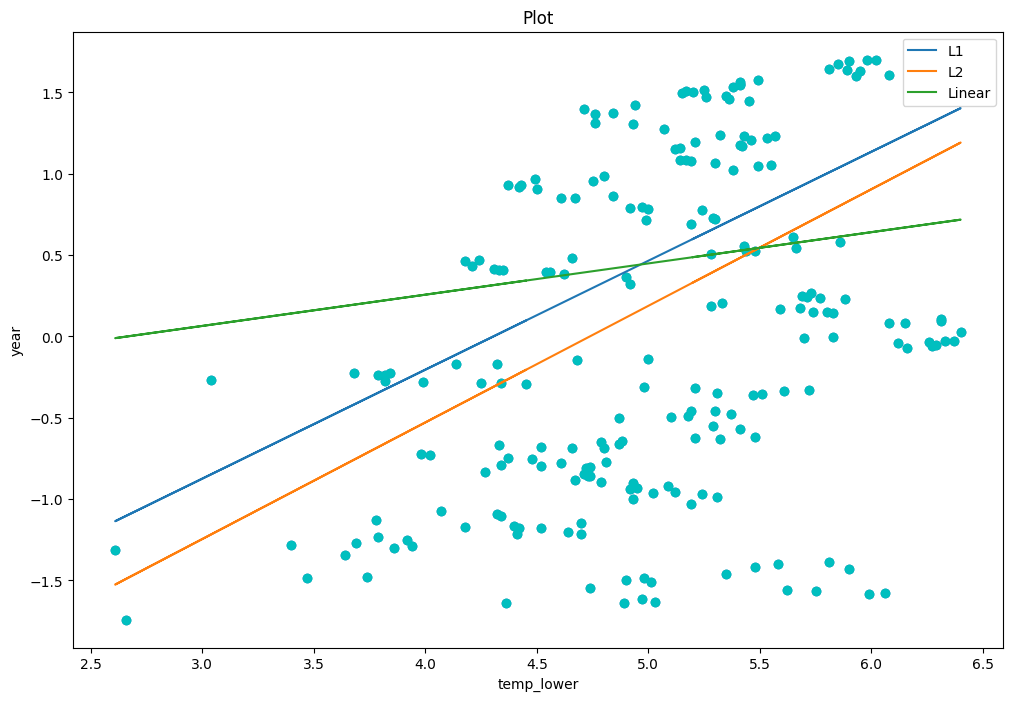

In [172]:
plt.figure(figsize=(12,8))
plt.scatter(x_test[temp_lower_indep], y_test)
plt.scatter(x_test[temp_lower_indep], y_test, c='c')
plt.plot(x_test[temp_lower_indep], l1_model.predict(x_test),label='L1')
plt.plot(x_test[temp_lower_indep], l2_model.predict(x_test),label='L2')
plt.plot(x_test[temp_lower_indep], linear_model.predict(x_test), label='Linear')
plt.xlabel('temp_lower')
plt.ylabel('year')
plt.title("Plot")
plt.legend();